# Performing Exploratory Data Analysis 

We are performing EDA on the mock data for CMS Experiment.

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [3]:
# Reading in the data as csv
data = pd.read_csv("output_data/background/BackgroundRegionData.csv") # Background Region

In [3]:
# data = pd.read_csv("output_data/electronRegion/ElectronRegionData.csv") # Electron Region
# data = pd.read_csv("output_data/tauRegion/TauRegionData.csv") # Tau Region

In [4]:
# View the data head
data.head()

,event,eta,phi,et,position,electron,tau
0,0,0,0,11.38480,0,0,1
1,0,0,1,9.11070,4,0,0
2,0,0,2,13.66120,16,0,0
3,0,0,3,3.50377,14,0,0
4,0,0,4,9.45493,2,0,0


**Data Dictionary**

- event: Event number (Integer)
- eta: Index of eta coordinate 0-13 (Integer)
- phi: Index of phi coordinate, 0-17, which is also specifies the optical link (Integer)
- et: Transverse energy deposited in the region (Float)
- position: Position of the cluster within the region, a 4-bit number (Integer)
- electron: Electron bit signifying that the region likely has an electron or photon deposit (Bool)
- tau: Tau bit signifying that the region likely has a tau deposit (Bool)

In [27]:
data.shape

(64512, 7)

Check for null values.

In [5]:
data.isnull().sum()

event       0
eta         0
phi         0
et          0
position    0
electron    0
tau         0
dtype: int64

There are no null values in the data.

### Exploratory Data Analysis (EDA)

Group the data by 'event' and calculate the mean of Energy transmission of each set of events.

In [7]:
# Group
et_mean = data.groupby(['event'], as_index=False)[['et']].mean()

In [8]:
# check the new grouped data
et_mean.head()

,event,et
0,0,10.078736
1,1,9.952396
2,2,9.919780
3,3,10.055665
4,4,10.076632


In [9]:
# Renaming the column names
et_mean.columns = ['event', 'et_mean']

# Sorting the DataFrame based on the number of customers
et_mean = et_mean.sort_values('et_mean', ascending=False)

# Looking at the first five rows
et_mean.head()

,event,et_mean
37,37,10.452899
201,201,10.368826
128,128,10.365324
174,174,10.355429
175,175,10.351304


Plot the mean values to see their distribution.

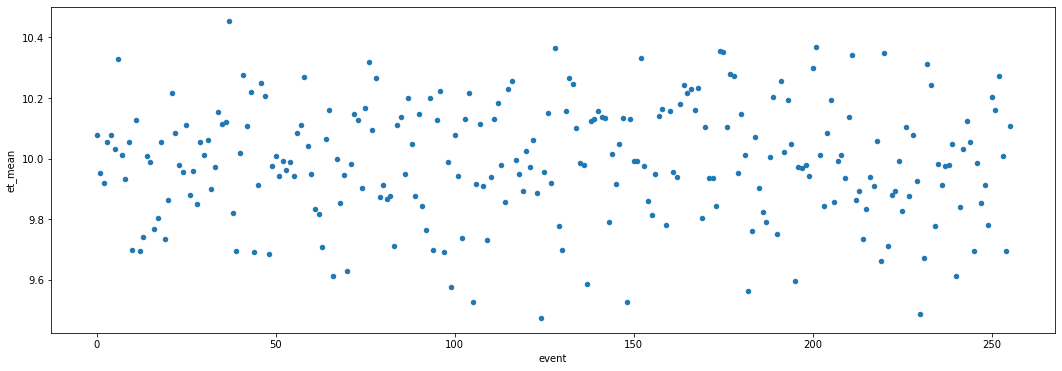

In [10]:
et_mean.plot.scatter(x='event', y = 'et_mean', figsize = (18,6))

Merge the original data and the mean values into a new dataframe.

In [11]:
new_data = data.merge(et_mean, on='event')

In [12]:
# View the data
new_data.head()

,event,eta,phi,et,position,electron,tau,et_mean
0,0,0,0,11.38480,0,0,1,10.078736
1,0,0,1,9.11070,4,0,0,10.078736
2,0,0,2,13.66120,16,0,0,10.078736
3,0,0,3,3.50377,14,0,0,10.078736
4,0,0,4,9.45493,2,0,0,10.078736


In [13]:
# Maximum value of ET
new_data['et'].max()

23.6226

In [14]:
# Maximum value of mean ET
new_data['et_mean'].max()

10.452898690476195

Checking for a particular event

In [15]:
zero_df = new_data.loc[new_data['event'] == 0]

In [16]:
zero_df.head()

,event,eta,phi,et,position,electron,tau,et_mean
0,0,0,0,11.38480,0,0,1,10.078736
1,0,0,1,9.11070,4,0,0,10.078736
2,0,0,2,13.66120,16,0,0,10.078736
3,0,0,3,3.50377,14,0,0,10.078736
4,0,0,4,9.45493,2,0,0,10.078736


In [17]:
zero_df.shape

(252, 8)

We have 252 rows of data and 8 columns.

In [18]:
# Getting the value of event count
zero_df['count'] = zero_df.index

Text(0, 0.5, 'ET values')

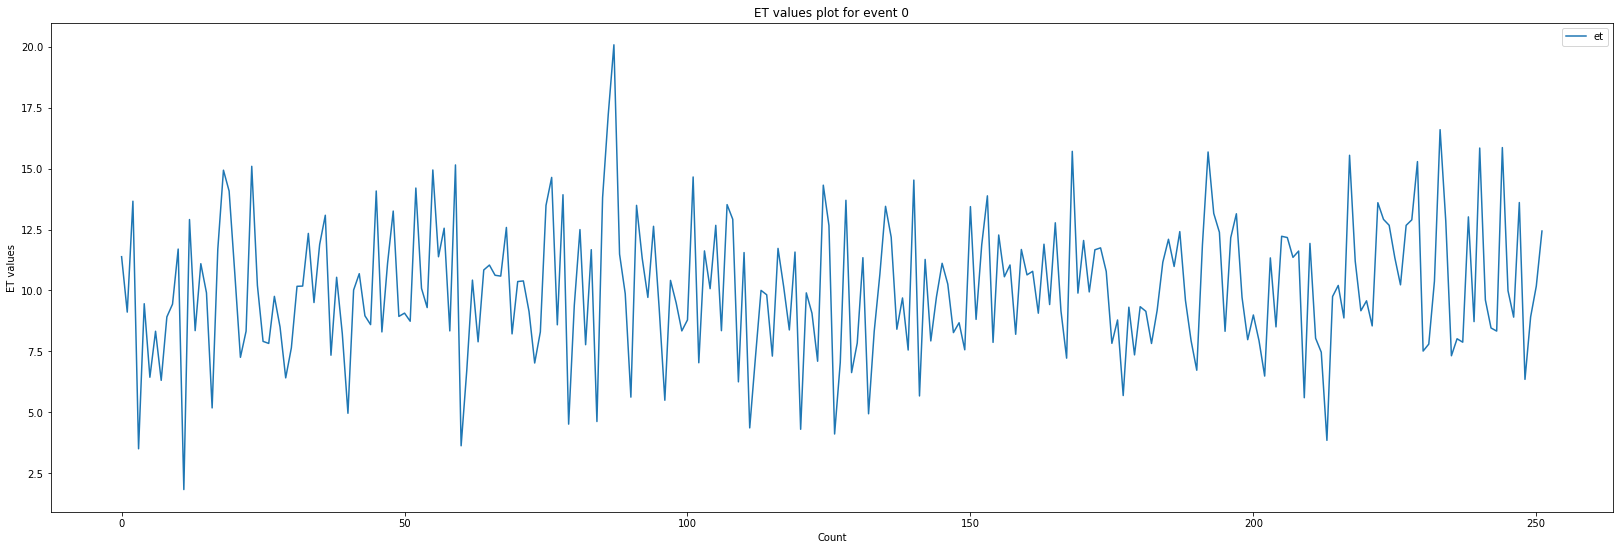

In [19]:
zero_df.plot.line(x='count', y = 'et', figsize=(28,9))
plt.title("ET values plot for event 0")
plt.xlabel("Count")
plt.ylabel("ET values")

Cropping the high peaks of ET based on z-score

In [20]:
et_df = zero_df[['et']]
et_df_signal = et_df[(np.abs(stats.zscore(et_df)) < 2).all(axis=1)]

Plotting both the graphs on the same plot to see the difference.

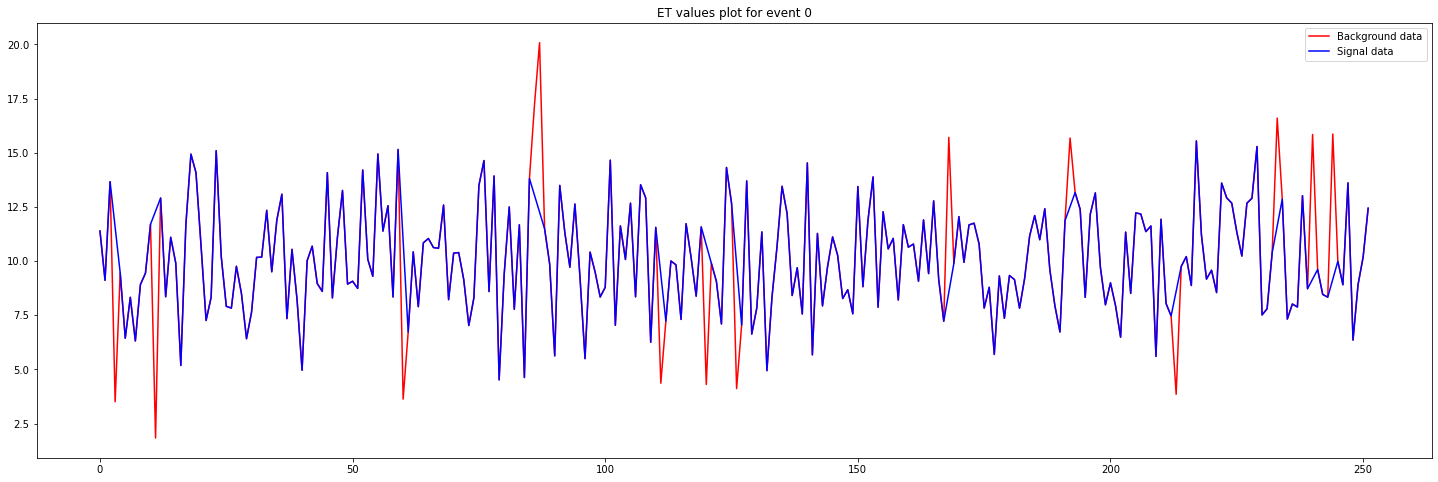

In [21]:
plt.figure(figsize=(25,8))
plt.plot(et_df,'r', label='Background data')
plt.plot(et_df_signal, 'b' ,label='Signal data')
plt.title("ET values plot for event 0")
plt.legend()

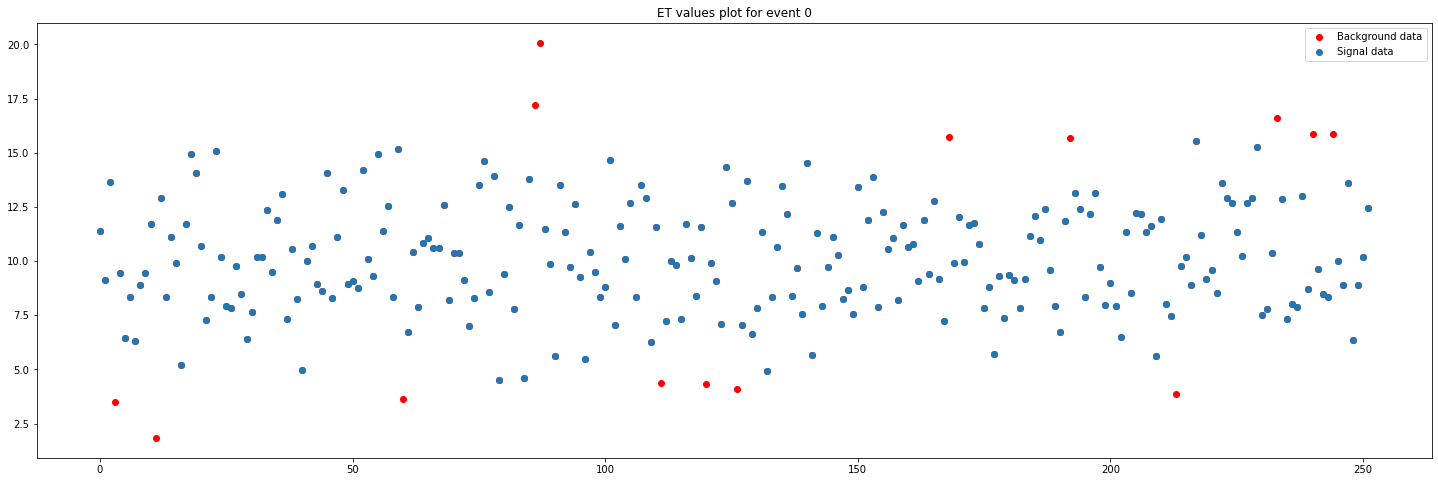

In [22]:
plt.figure(figsize=(25,8))
plt.scatter(et_df.index, et_df['et'], label='Background data', color = "red")
plt.scatter(et_df_signal.index, et_df_signal['et'], label='Signal data')
plt.title("ET values plot for event 0")
plt.legend()

---

### Feature relationships

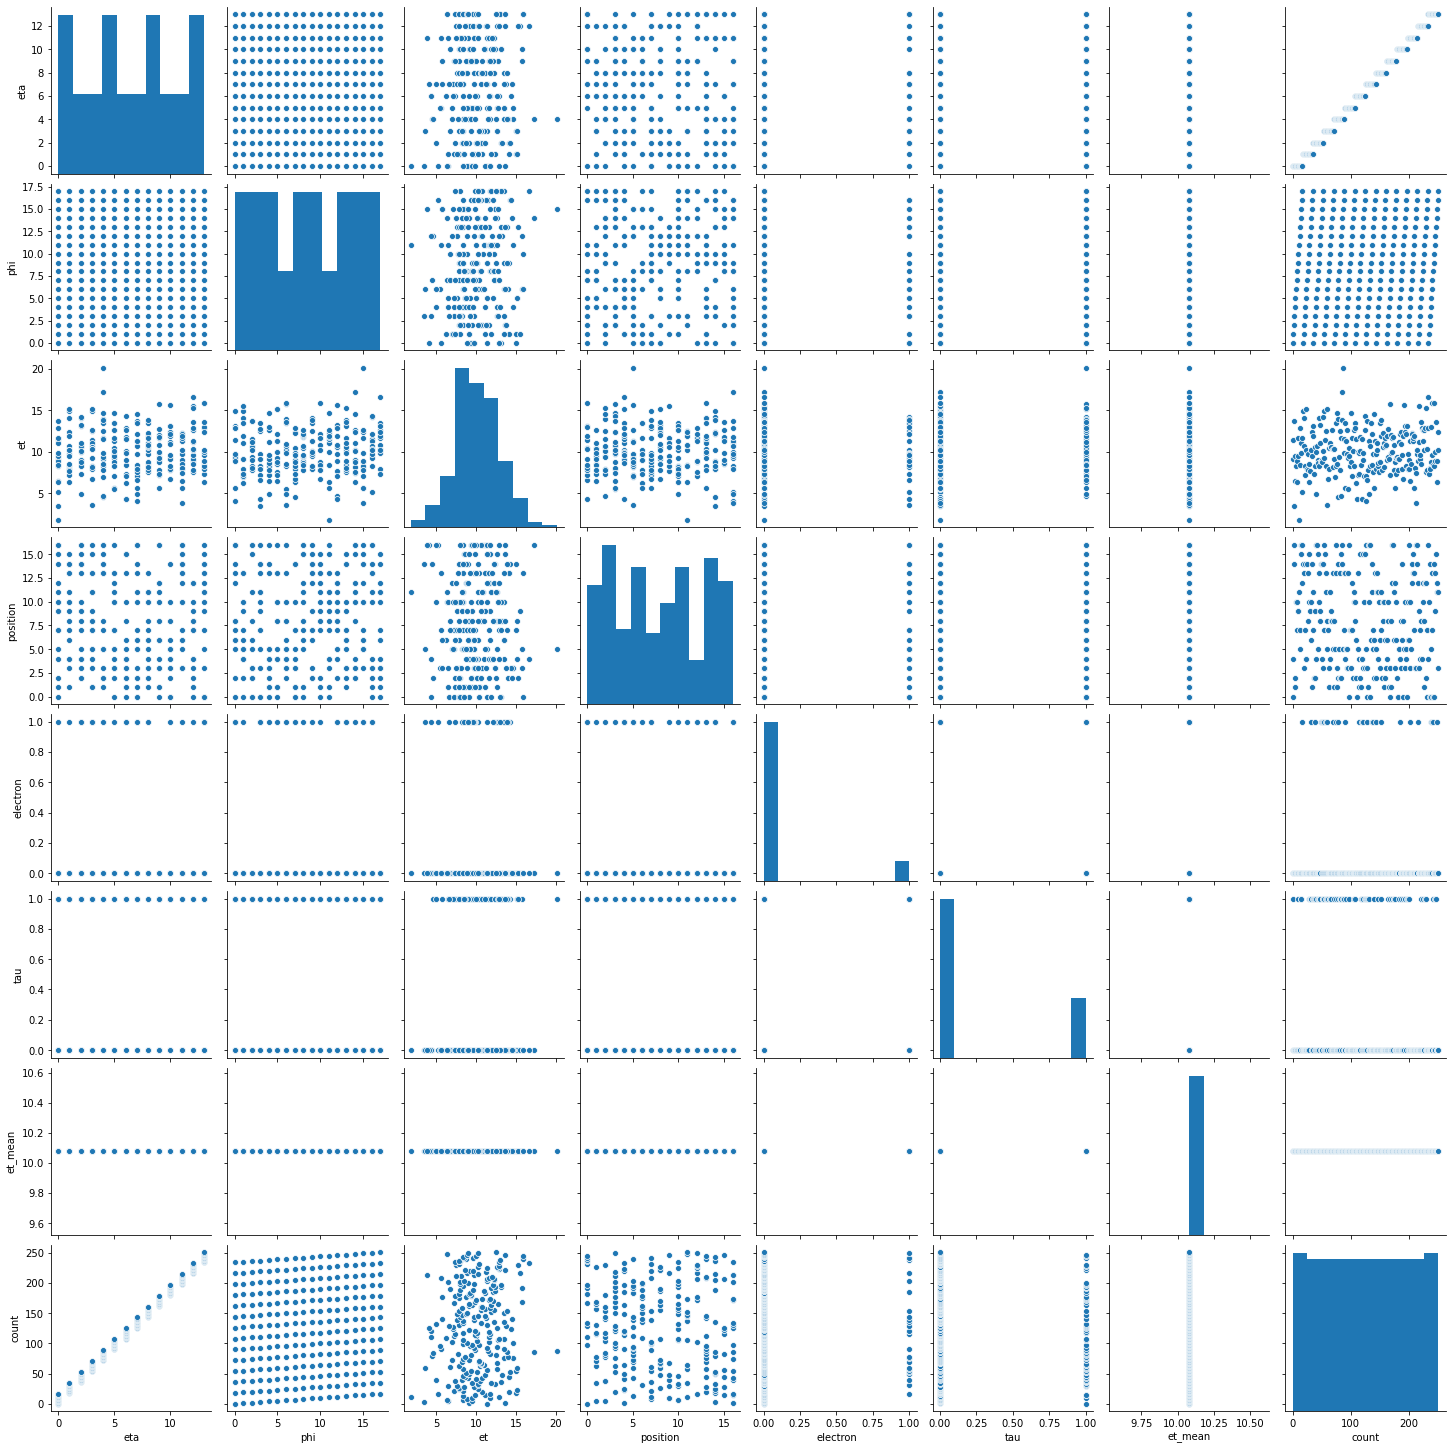

In [34]:
sns.pairplot(zero_df.drop('event', axis = 1))

<Figure size 1296x432 with 0 Axes>

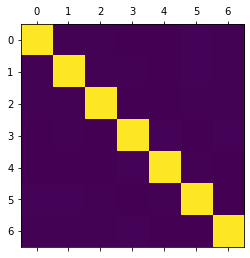

In [30]:
plt.figure(figsize=(18,6))
plt.matshow(data.corr())

### Model building 

Possible methods to use:
- K-means Clustering
- Isolation Forest
- Deep Learning methods